# Hyper-Parameter Tuning # Hidden Layers

In [1]:
import os
import sys

# CHANGE LEVELS:
chdir = os.path.dirname(os.getcwd())
sys.path.insert(0, chdir)

# Importing all the modules and functions related to constructing MLP network models

from network.net import Net                   # Net class, base class for constructing MLP networks
from network.layer import Linear              # Linear class, child class of parent class Layer 
from network.loss import CrossEntropyLoss     # CrossEntropyLoss class, child class of parent class Loss
from network.activ import ReLU, LeakyReLU     # ReLU, LeakyReLU classes, child classes of parent class Activation
from network.optim import SGD, Adam           # SGD, Adam classes, child classes of parent class Optimizer

In [2]:
# Importing all the modules and functions related to data processing including loaders for the assignment data

# Process module contains functions relating to data processing:
from network.loader.process import (
    train_test_split,        # Function to split data with chosen ratio, data can be shuffled
    normalize,               # Normalizes data to have mean of zero and unit variance
    standardize,             # Normalizes data to be between range 0-1, i.e. standardizes data
    one_hot,                 # One hot encoding: 100% prob of 2 is [0, 0, 1] with 3 classes
    pca                      # Reduces data to chosen K principal components
) 

# Data module for loading the assignment data
from network.dataset.source import (
    get_data_from_file,   # Loads assignment data from file (must be within main directory)
    get_data_from_url     # Loads assignment data from public GitHub repo that stores data
)

# Data loader module for automating processing of and loading of assignment data based on parameter selections
from network.loader.data_loader import load_train_val_test  # Parameter selections decide method of processing

import numpy as np
import matplotlib.pyplot as pl
import pandas as pd 
import seaborn as sns

# setting random seed
np.random.seed(123)

In [3]:
def plot_results(stats):
    ep, tl, ta, vl, va = stats
    pl.figure(figsize = (10, 7))

    fig, ((ax1, ax2), (ax3, ax4)) = pl.subplots(2, 2)
    fig.suptitle(f'Training Results, best model found @ Epoch {ep}')

    ax1.plot(tl)
    ax1.set_title('Training Loss')

    ax2.plot(vl, 'tab:orange')
    ax2.set_title('Validation Loss')

    ax3.plot(ta, 'tab:green')
    ax3.set_title('Training Accuracy')

    ax4.plot(va, 'tab:red')
    ax4.set_title('Validation Accuracy')
    
    for ax in fig.get_axes():
        ax.label_outer()

    pl.show()

# Note as we are loading data from URL it will take longer than from file.
train_set, valid_set, test_set = load_train_val_test(
    source = "url", method = "standardize", pca_N = 0, n_categories = 10, ratio = 0.2, shuffle = True
)         

## Current Best Model

In [4]:
mlp = Net(
    optimizer = Adam(),
    criterion = CrossEntropyLoss(),
    batch_norm = True,
    L2_reg_term = 0.001
)

mlp.add(Linear(128, 1024, dropout=0.4))
mlp.add(ReLU())
mlp.add(Linear(1024, 512, dropout=0.2))
mlp.add(ReLU())
mlp.add(Linear(512, 64, dropout=0.2))
mlp.add(ReLU())
mlp.add(Linear(64, 16, dropout=0.2))
mlp.add(ReLU())
mlp.add(Linear(16, 10))  


mlp.set_name("Adam_network")
print(f"{mlp.model_name} is initialized and ready to be trained.")

Adam_network is initialized and ready to be trained.


## 0: Train and Evaluate Current Best Model

In [5]:
best = mlp.train_convergence(
    train_set = train_set,
    valid_set = valid_set,
    batch_size = 500,
    planned_epochs = 100,
    last_check = 10,
    threshold = 1e-25,
    report_interval = 5
)

{"tags": ["hide-output"]}

  1%|█▍                                                                                                                                           | 1/100 [00:08<13:40,  8.29s/it]

Epoch: 0	Interval Time: 8.3 sec(s)	Training Loss: 2.213828		Training Accuracy: 0.226825
						Validation Loss:1.867397	Validation Accuracy: 0.350100


  6%|████████▍                                                                                                                                    | 6/100 [00:51<13:52,  8.85s/it]

Epoch: 5	Interval Time: 43.5 sec(s)	Training Loss: 1.574976		Training Accuracy: 0.458350
						Validation Loss:1.481806	Validation Accuracy: 0.504200


 11%|███████████████▍                                                                                                                            | 11/100 [01:36<13:17,  8.97s/it]

Epoch: 10	Interval Time: 45.0 sec(s)	Training Loss: 1.417001		Training Accuracy: 0.531750
						Validation Loss:1.382571	Validation Accuracy: 0.546100


 16%|██████████████████████▍                                                                                                                     | 16/100 [02:21<12:24,  8.86s/it]

Epoch: 15	Interval Time: 44.3 sec(s)	Training Loss: 1.331786		Training Accuracy: 0.573775
						Validation Loss:1.346598	Validation Accuracy: 0.563900


 21%|█████████████████████████████▍                                                                                                              | 21/100 [03:06<11:53,  9.03s/it]

Epoch: 20	Interval Time: 45.3 sec(s)	Training Loss: 1.273557		Training Accuracy: 0.604275
						Validation Loss:1.315492	Validation Accuracy: 0.576700


 26%|████████████████████████████████████▍                                                                                                       | 26/100 [03:52<11:31,  9.34s/it]

Epoch: 25	Interval Time: 46.4 sec(s)	Training Loss: 1.231234		Training Accuracy: 0.628075
						Validation Loss:1.314901	Validation Accuracy: 0.579400


 31%|███████████████████████████████████████████▍                                                                                                | 31/100 [04:39<10:36,  9.22s/it]

Epoch: 30	Interval Time: 46.2 sec(s)	Training Loss: 1.193900		Training Accuracy: 0.647725
						Validation Loss:1.301203	Validation Accuracy: 0.587400


 36%|██████████████████████████████████████████████████▍                                                                                         | 36/100 [05:25<10:02,  9.41s/it]

Epoch: 35	Interval Time: 46.4 sec(s)	Training Loss: 1.168793		Training Accuracy: 0.659200
						Validation Loss:1.301198	Validation Accuracy: 0.583700


 41%|█████████████████████████████████████████████████████████▍                                                                                  | 41/100 [06:11<09:10,  9.34s/it]

Epoch: 40	Interval Time: 46.1 sec(s)	Training Loss: 1.150525		Training Accuracy: 0.668050
						Validation Loss:1.294413	Validation Accuracy: 0.587600


 46%|████████████████████████████████████████████████████████████████▍                                                                           | 46/100 [06:58<08:18,  9.23s/it]

Epoch: 45	Interval Time: 46.6 sec(s)	Training Loss: 1.126710		Training Accuracy: 0.677550
						Validation Loss:1.291413	Validation Accuracy: 0.593300


 50%|██████████████████████████████████████████████████████████████████████                                                                      | 50/100 [07:39<07:39,  9.18s/it]

Epoch: 50	Interval Time: 41.0 sec(s)	Training Loss: 1.109057		Training Accuracy: 0.688575
						Validation Loss:1.292969	Validation Accuracy: 0.592400


Minimum percent change (1e-25%) in training loss not exceeded.

Convergence criteria achieved.
Training completed @ Epoch 50.
Total training time: 7 min 39.1 s

                Best model found @ Epoch 45
                --------------------------------------------
                Training Loss: 1.126710
                Validation Loss: 1.291413
                --------------------------------------------
                Training Accuracy: 0.677550
                Validation Accuracy: 0.593300


Best model 'Adam_network' saved in 'model/' directory.


{'tags': ['hide-output']}

<Figure size 720x504 with 0 Axes>

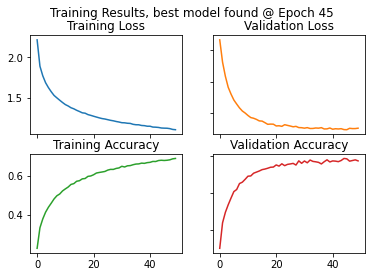

In [6]:
plot_results(best)

In [7]:
# Loading best model found:

best_model = Net.load_model("model/" + mlp.model_name)
best_model.test_network(train_set, "train data")
best_model.test_network(valid_set, "valid data")
best_model.test_network(test_set, "test data")

-------------------------------------------
Accuracy on train data: 86.06%
Total Count:  40000
Total Match:  34425
-------------------------------------------
Test Accuracy of	0: 92.75% (3737/4029)
Test Accuracy of	1: 80.45% (3235/4021)
Test Accuracy of	2: 76.63% (3052/3983)
Test Accuracy of	3: 84.88% (3356/3954)
Test Accuracy of	4: 76.94% (3083/4007)
Test Accuracy of	5: 90.69% (3655/4030)
Test Accuracy of	6: 90.49% (3665/4050)
Test Accuracy of	7: 91.00% (3620/3978)
Test Accuracy of	8: 88.53% (3527/3984)
Test Accuracy of	9: 88.17% (3495/3964)
-------------------------------------------
Accuracy on valid data: 59.33%
Total Count:  10000
Total Match:  5933
-------------------------------------------
Test Accuracy of	0: 73.12% (710/971)
Test Accuracy of	1: 45.45% (445/979)
Test Accuracy of	2: 40.31% (410/1017)
Test Accuracy of	3: 54.49% (570/1046)
Test Accuracy of	4: 44.61% (443/993)
Test Accuracy of	5: 67.63% (656/970)
Test Accuracy of	6: 65.37% (621/950)
Test Accuracy of	7: 73.09% (747/

# 1: Removing a layer

Note: need to ensure output dims match input dims of next layer:

### Scenario A

In [8]:
remA = Net(
    optimizer = Adam(),
    criterion = CrossEntropyLoss(),
    batch_norm = True,
    L2_reg_term = 0.001
)

remA.add(Linear(128, 1024, dropout=0.4))
remA.add(ReLU())
remA.add(Linear(1024, 512, dropout=0.2))
remA.add(ReLU())
remA.add(Linear(512, 16, dropout=0.2))
remA.add(ReLU())
#mlp.add(Linear(64, 16, dropout=0.2))   # removing this layer
#mlp.add(ReLU())
remA.add(Linear(16, 10))  

### Train and Evaluate Scenario A

In [9]:

remA.set_name("remA")
print(f"{mlp.model_name} is initialized and ready to be trained.")

remAT = remA.train_convergence(
    train_set = train_set,
    valid_set = valid_set,
    batch_size = 500,
    planned_epochs = 100,
    last_check = 10,
    threshold = 1e-25,
    report_interval = 5
)

{"tags": ["hide-output"]}

Adam_network is initialized and ready to be trained.


  1%|█▍                                                                                                                                           | 1/100 [00:07<12:14,  7.42s/it]

Epoch: 0	Interval Time: 7.4 sec(s)	Training Loss: 2.024905		Training Accuracy: 0.273700
						Validation Loss:1.750469	Validation Accuracy: 0.396800


  6%|████████▍                                                                                                                                    | 6/100 [00:46<12:12,  7.79s/it]

Epoch: 5	Interval Time: 38.8 sec(s)	Training Loss: 1.515017		Training Accuracy: 0.489375
						Validation Loss:1.474686	Validation Accuracy: 0.510900


 11%|███████████████▍                                                                                                                            | 11/100 [01:27<12:17,  8.28s/it]

Epoch: 10	Interval Time: 41.2 sec(s)	Training Loss: 1.378228		Training Accuracy: 0.550250
						Validation Loss:1.378452	Validation Accuracy: 0.549300


 16%|██████████████████████▍                                                                                                                     | 16/100 [02:07<11:00,  7.86s/it]

Epoch: 15	Interval Time: 39.9 sec(s)	Training Loss: 1.304036		Training Accuracy: 0.583700
						Validation Loss:1.349824	Validation Accuracy: 0.568500


 21%|█████████████████████████████▍                                                                                                              | 21/100 [02:51<11:52,  9.02s/it]

Epoch: 20	Interval Time: 44.3 sec(s)	Training Loss: 1.257405		Training Accuracy: 0.606800
						Validation Loss:1.334707	Validation Accuracy: 0.575000


 24%|█████████████████████████████████▌                                                                                                          | 24/100 [03:25<10:51,  8.57s/it]



Minimum percent change (1e-25%) in training loss not exceeded.

Convergence criteria achieved.
Training completed @ Epoch 24.
Total training time: 3 min 25.7 s

                Best model found @ Epoch 24
                --------------------------------------------
                Training Loss: 1.238887
                Validation Loss: 1.319198
                --------------------------------------------
                Training Accuracy: 0.614475
                Validation Accuracy: 0.577400


Best model 'remA' saved in 'model/' directory.


{'tags': ['hide-output']}

<Figure size 720x504 with 0 Axes>

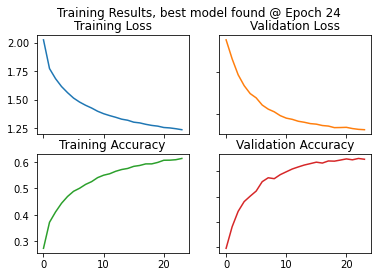

In [10]:
plot_results(remAT)

In [11]:
# Loading best model found:

best_model = Net.load_model("model/" + remA.model_name)
best_model.test_network(train_set, "train data")
best_model.test_network(valid_set, "valid data")
best_model.test_network(test_set, "test data")

-------------------------------------------
Accuracy on train data: 77.99%
Total Count:  40000
Total Match:  31196
-------------------------------------------
Test Accuracy of	0: 86.90% (3501/4029)
Test Accuracy of	1: 66.90% (2690/4021)
Test Accuracy of	2: 69.34% (2762/3983)
Test Accuracy of	3: 74.66% (2952/3954)
Test Accuracy of	4: 56.83% (2277/4007)
Test Accuracy of	5: 84.94% (3423/4030)
Test Accuracy of	6: 83.01% (3362/4050)
Test Accuracy of	7: 87.71% (3489/3978)
Test Accuracy of	8: 87.00% (3466/3984)
Test Accuracy of	9: 82.59% (3274/3964)
-------------------------------------------
Accuracy on valid data: 57.74%
Total Count:  10000
Total Match:  5774
-------------------------------------------
Test Accuracy of	0: 68.59% (666/971)
Test Accuracy of	1: 40.55% (397/979)
Test Accuracy of	2: 43.36% (441/1017)
Test Accuracy of	3: 52.49% (549/1046)
Test Accuracy of	4: 39.78% (395/993)
Test Accuracy of	5: 66.08% (641/970)
Test Accuracy of	6: 60.32% (573/950)
Test Accuracy of	7: 74.17% (758/

### Scenario B

In [12]:
remB = Net(
    optimizer = Adam(),
    criterion = CrossEntropyLoss(),
    batch_norm = True,
    L2_reg_term = 0.001
)

remB.add(Linear(128, 1024, dropout=0.4))
remB.add(ReLU())
remB.add(Linear(1024, 64, dropout=0.2))
remB.add(ReLU())
#remB.add(Linear(512, 16, dropout=0.2))  # removing this layer
#remB.add(ReLU())
remB.add(Linear(64, 16, dropout=0.2))   
remB.add(ReLU())
remB.add(Linear(16, 10))

### Train and Evaluate Scenario B

In [13]:
remB.set_name("remB")
print(f"{mlp.model_name} is initialized and ready to be trained.")

remB_stat = remB.train_convergence(
    train_set = train_set,
    valid_set = valid_set,
    batch_size = 500,
    planned_epochs = 100,
    last_check = 10,
    threshold = 1e-25,
    report_interval = 5
)

{"tags": ["hide-output"]}

Adam_network is initialized and ready to be trained.


  1%|█▍                                                                                                                                           | 1/100 [00:04<07:41,  4.66s/it]

Epoch: 0	Interval Time: 4.6 sec(s)	Training Loss: 2.193259		Training Accuracy: 0.220975
						Validation Loss:1.844722	Validation Accuracy: 0.367400


  6%|████████▍                                                                                                                                    | 6/100 [00:28<07:35,  4.84s/it]

Epoch: 5	Interval Time: 24.3 sec(s)	Training Loss: 1.622170		Training Accuracy: 0.435975
						Validation Loss:1.544687	Validation Accuracy: 0.482100


 11%|███████████████▍                                                                                                                            | 11/100 [00:51<06:46,  4.57s/it]

Epoch: 10	Interval Time: 22.7 sec(s)	Training Loss: 1.487146		Training Accuracy: 0.492725
						Validation Loss:1.437874	Validation Accuracy: 0.524200


 16%|██████████████████████▍                                                                                                                     | 16/100 [01:13<06:11,  4.42s/it]

Epoch: 15	Interval Time: 22.1 sec(s)	Training Loss: 1.402600		Training Accuracy: 0.534050
						Validation Loss:1.389964	Validation Accuracy: 0.542000


 21%|█████████████████████████████▍                                                                                                              | 21/100 [01:34<05:37,  4.28s/it]

Epoch: 20	Interval Time: 21.3 sec(s)	Training Loss: 1.348399		Training Accuracy: 0.565050
						Validation Loss:1.363972	Validation Accuracy: 0.556700


 26%|████████████████████████████████████▍                                                                                                       | 26/100 [01:57<05:37,  4.56s/it]

Epoch: 25	Interval Time: 22.9 sec(s)	Training Loss: 1.322098		Training Accuracy: 0.574925
						Validation Loss:1.344735	Validation Accuracy: 0.566800


 31%|███████████████████████████████████████████▍                                                                                                | 31/100 [02:19<04:59,  4.35s/it]

Epoch: 30	Interval Time: 21.5 sec(s)	Training Loss: 1.293016		Training Accuracy: 0.590450
						Validation Loss:1.335203	Validation Accuracy: 0.572300


 34%|███████████████████████████████████████████████▌                                                                                            | 34/100 [02:36<05:04,  4.61s/it]



Minimum percent change (1e-25%) in training loss not exceeded.

Convergence criteria achieved.
Training completed @ Epoch 34.
Total training time: 2 min 36.7 s

                Best model found @ Epoch 34
                --------------------------------------------
                Training Loss: 1.276709
                Validation Loss: 1.327389
                --------------------------------------------
                Training Accuracy: 0.601125
                Validation Accuracy: 0.574100


Best model 'remB' saved in 'model/' directory.


{'tags': ['hide-output']}

<Figure size 720x504 with 0 Axes>

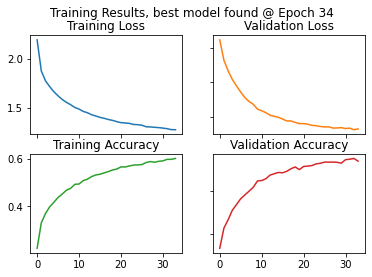

In [14]:
plot_results(remB_stat)

In [15]:
# Loading best model found:

best_model = Net.load_model("model/" + remB.model_name)
best_model.test_network(train_set, "train data")
best_model.test_network(valid_set, "valid data")
best_model.test_network(test_set, "test data")

-------------------------------------------
Accuracy on train data: 76.05%
Total Count:  40000
Total Match:  30422
-------------------------------------------
Test Accuracy of	0: 87.71% (3534/4029)
Test Accuracy of	1: 65.66% (2640/4021)
Test Accuracy of	2: 60.56% (2412/3983)
Test Accuracy of	3: 69.20% (2736/3954)
Test Accuracy of	4: 57.72% (2313/4007)
Test Accuracy of	5: 86.45% (3484/4030)
Test Accuracy of	6: 82.81% (3354/4050)
Test Accuracy of	7: 87.25% (3471/3978)
Test Accuracy of	8: 84.14% (3352/3984)
Test Accuracy of	9: 78.86% (3126/3964)
-------------------------------------------
Accuracy on valid data: 57.41%
Total Count:  10000
Total Match:  5741
-------------------------------------------
Test Accuracy of	0: 70.96% (689/971)
Test Accuracy of	1: 39.53% (387/979)
Test Accuracy of	2: 40.02% (407/1017)
Test Accuracy of	3: 50.10% (524/1046)
Test Accuracy of	4: 40.68% (404/993)
Test Accuracy of	5: 68.87% (668/970)
Test Accuracy of	6: 62.84% (597/950)
Test Accuracy of	7: 74.95% (766/

### Scenario C

In [16]:
remC = Net(
    optimizer = Adam(),
    criterion = CrossEntropyLoss(),
    batch_norm = True,
    L2_reg_term = 0.001
)

remC.add(Linear(128, 1024, dropout=0.4))
remC.add(ReLU())
#remC.add(Linear(1024, 64, dropout=0.2))   # removing this layer
#remC.add(ReLU())
remC.add(Linear(1024, 64, dropout=0.2))  
remC.add(ReLU())
remC.add(Linear(64, 16, dropout=0.2))   
remC.add(ReLU())
remC.add(Linear(16, 10))

### Train and Evaluate Scenario C

In [17]:

remC.set_name("remC")
print(f"{remC.model_name} is initialized and ready to be trained.")

remC_stat = remC.train_convergence(
    train_set = train_set,
    valid_set = valid_set,
    batch_size = 500,
    planned_epochs = 100,
    last_check = 10,
    threshold = 1e-25,
    report_interval = 5
)

{"tags": ["hide-output"]}

remC is initialized and ready to be trained.


  1%|█▍                                                                                                                                           | 1/100 [00:04<07:43,  4.68s/it]

Epoch: 0	Interval Time: 4.7 sec(s)	Training Loss: 2.210719		Training Accuracy: 0.231975
						Validation Loss:1.848732	Validation Accuracy: 0.368000


  6%|████████▍                                                                                                                                    | 6/100 [00:26<06:59,  4.47s/it]

Epoch: 5	Interval Time: 22.0 sec(s)	Training Loss: 1.608983		Training Accuracy: 0.439600
						Validation Loss:1.538671	Validation Accuracy: 0.485600


 11%|███████████████▍                                                                                                                            | 11/100 [00:51<07:20,  4.95s/it]

Epoch: 10	Interval Time: 25.0 sec(s)	Training Loss: 1.473548		Training Accuracy: 0.500800
						Validation Loss:1.423571	Validation Accuracy: 0.536100


 16%|██████████████████████▍                                                                                                                     | 16/100 [01:15<06:46,  4.84s/it]

Epoch: 15	Interval Time: 23.6 sec(s)	Training Loss: 1.396154		Training Accuracy: 0.536425
						Validation Loss:1.379087	Validation Accuracy: 0.553200


 21%|█████████████████████████████▍                                                                                                              | 21/100 [01:39<06:17,  4.78s/it]

Epoch: 20	Interval Time: 24.6 sec(s)	Training Loss: 1.346378		Training Accuracy: 0.561625
						Validation Loss:1.354407	Validation Accuracy: 0.565000


 26%|████████████████████████████████████▍                                                                                                       | 26/100 [02:03<05:49,  4.72s/it]

Epoch: 25	Interval Time: 23.5 sec(s)	Training Loss: 1.314736		Training Accuracy: 0.577225
						Validation Loss:1.341496	Validation Accuracy: 0.566200


 31%|███████████████████████████████████████████▍                                                                                                | 31/100 [02:26<05:10,  4.51s/it]

Epoch: 30	Interval Time: 22.9 sec(s)	Training Loss: 1.287766		Training Accuracy: 0.591625
						Validation Loss:1.336896	Validation Accuracy: 0.569800


 36%|██████████████████████████████████████████████████▍                                                                                         | 36/100 [02:48<04:43,  4.43s/it]

Epoch: 35	Interval Time: 22.0 sec(s)	Training Loss: 1.270825		Training Accuracy: 0.600350
						Validation Loss:1.330571	Validation Accuracy: 0.573900


 36%|██████████████████████████████████████████████████▍                                                                                         | 36/100 [02:52<05:07,  4.80s/it]



Minimum percent change (1e-25%) in training loss not exceeded.

Convergence criteria achieved.
Training completed @ Epoch 36.
Total training time: 2 min 52.7 s

                Best model found @ Epoch 36
                --------------------------------------------
                Training Loss: 1.273752
                Validation Loss: 1.328997
                --------------------------------------------
                Training Accuracy: 0.600175
                Validation Accuracy: 0.573100


Best model 'remC' saved in 'model/' directory.


{'tags': ['hide-output']}

<Figure size 720x504 with 0 Axes>

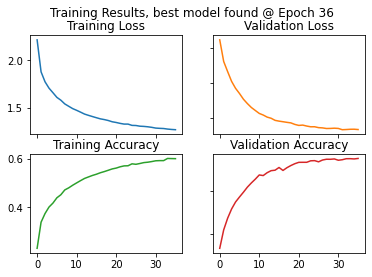

In [18]:
plot_results(remC_stat)

In [19]:
# Loading best model found:

best_model = Net.load_model("model/" + remC.model_name)
best_model.test_network(train_set, "train data")
best_model.test_network(valid_set, "valid data")
best_model.test_network(test_set, "test data")

-------------------------------------------
Accuracy on train data: 76.57%
Total Count:  40000
Total Match:  30627
-------------------------------------------
Test Accuracy of	0: 88.21% (3554/4029)
Test Accuracy of	1: 66.92% (2691/4021)
Test Accuracy of	2: 61.64% (2455/3983)
Test Accuracy of	3: 72.05% (2849/3954)
Test Accuracy of	4: 58.45% (2342/4007)
Test Accuracy of	5: 85.61% (3450/4030)
Test Accuracy of	6: 83.28% (3373/4050)
Test Accuracy of	7: 85.82% (3414/3978)
Test Accuracy of	8: 84.51% (3367/3984)
Test Accuracy of	9: 79.01% (3132/3964)
-------------------------------------------
Accuracy on valid data: 57.31%
Total Count:  10000
Total Match:  5731
-------------------------------------------
Test Accuracy of	0: 70.24% (682/971)
Test Accuracy of	1: 41.98% (411/979)
Test Accuracy of	2: 40.71% (414/1017)
Test Accuracy of	3: 49.90% (522/1046)
Test Accuracy of	4: 41.99% (417/993)
Test Accuracy of	5: 65.57% (636/970)
Test Accuracy of	6: 63.16% (600/950)
Test Accuracy of	7: 72.60% (742/

# 2: Adding a Layer

For consistency, let's choose an output dimension for an added hidden layer to be half the size of the output dims in the previous layer.

### Scenario A

In [20]:
mlp = Net(
    optimizer = Adam(),
    criterion = CrossEntropyLoss(),
    batch_norm = True,
    L2_reg_term = 0.001
)

mlp.add(Linear(128, 1024, dropout=0.4))
mlp.add(ReLU())
mlp.add(Linear(1024, 512, dropout=0.2))
mlp.add(ReLU())
mlp.add(Linear(512, 64, dropout=0.2))
mlp.add(ReLU())
# Adding layer
mlp.add(Linear(64, 32, dropout=0.2))  # half above output
mlp.add(ReLU())
mlp.add(Linear(32, 16, dropout=0.2))  # reduce 64 to match 32
mlp.add(ReLU())
mlp.add(Linear(16, 10))  


mlp.set_name("Adam_network")
print(f"{mlp.model_name} is initialized and ready to be trained.")

Adam_network is initialized and ready to be trained.


### Train and Evaluate Scenario A

In [21]:

mlp.set_name("add")
print(f"{mlp.model_name} is initialized and ready to be trained.")

addA = mlp.train_convergence(
    train_set = train_set,
    valid_set = valid_set,
    batch_size = 500,
    planned_epochs = 100,
    last_check = 10,
    threshold = 1e-25,
    report_interval = 5
)

{"tags": ["hide-output"]}

add is initialized and ready to be trained.


  1%|█▍                                                                                                                                           | 1/100 [00:07<13:04,  7.93s/it]

Epoch: 0	Interval Time: 7.9 sec(s)	Training Loss: 2.290060		Training Accuracy: 0.185275
						Validation Loss:1.914627	Validation Accuracy: 0.313400


  6%|████████▍                                                                                                                                    | 6/100 [00:48<12:58,  8.28s/it]

Epoch: 5	Interval Time: 40.9 sec(s)	Training Loss: 1.676340		Training Accuracy: 0.406000
						Validation Loss:1.566034	Validation Accuracy: 0.465700


 11%|███████████████▍                                                                                                                            | 11/100 [01:30<12:26,  8.39s/it]

Epoch: 10	Interval Time: 41.5 sec(s)	Training Loss: 1.508287		Training Accuracy: 0.489325
						Validation Loss:1.442713	Validation Accuracy: 0.520400


 16%|██████████████████████▍                                                                                                                     | 16/100 [02:09<11:00,  7.86s/it]

Epoch: 15	Interval Time: 39.1 sec(s)	Training Loss: 1.406465		Training Accuracy: 0.540925
						Validation Loss:1.384610	Validation Accuracy: 0.537500


 21%|█████████████████████████████▍                                                                                                              | 21/100 [02:47<09:57,  7.56s/it]

Epoch: 20	Interval Time: 38.0 sec(s)	Training Loss: 1.343609		Training Accuracy: 0.572750
						Validation Loss:1.350632	Validation Accuracy: 0.551300


 26%|████████████████████████████████████▍                                                                                                       | 26/100 [03:23<08:58,  7.27s/it]

Epoch: 25	Interval Time: 36.0 sec(s)	Training Loss: 1.295893		Training Accuracy: 0.590375
						Validation Loss:1.342343	Validation Accuracy: 0.561300


 31%|███████████████████████████████████████████▍                                                                                                | 31/100 [04:02<08:47,  7.64s/it]

Epoch: 30	Interval Time: 38.8 sec(s)	Training Loss: 1.268212		Training Accuracy: 0.602150
						Validation Loss:1.333130	Validation Accuracy: 0.560400


 36%|██████████████████████████████████████████████████▍                                                                                         | 36/100 [04:41<08:23,  7.86s/it]

Epoch: 35	Interval Time: 39.2 sec(s)	Training Loss: 1.235945		Training Accuracy: 0.618325
						Validation Loss:1.324421	Validation Accuracy: 0.567300


 40%|████████████████████████████████████████████████████████                                                                                    | 40/100 [05:20<08:01,  8.02s/it]

Epoch: 40	Interval Time: 39.4 sec(s)	Training Loss: 1.217017		Training Accuracy: 0.626550
						Validation Loss:1.317501	Validation Accuracy: 0.571700


Minimum percent change (1e-25%) in training loss not exceeded.

Convergence criteria achieved.
Training completed @ Epoch 40.
Total training time: 5 min 20.7 s

                Best model found @ Epoch 40
                --------------------------------------------
                Training Loss: 1.217017
                Validation Loss: 1.317501
                --------------------------------------------
                Training Accuracy: 0.626550
                Validation Accuracy: 0.571700


Best model 'add' saved in 'model/' directory.


{'tags': ['hide-output']}

<Figure size 720x504 with 0 Axes>

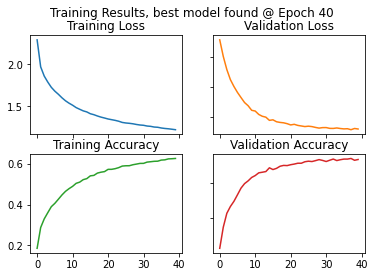

In [23]:
plot_results(addA)

In [24]:
# Loading best model found:

best_model = Net.load_model("model/" + mlp.model_name)
best_model.test_network(train_set, "train data")
best_model.test_network(valid_set, "valid data")
best_model.test_network(test_set, "test data")

-------------------------------------------
Accuracy on train data: 77.91%
Total Count:  40000
Total Match:  31162
-------------------------------------------
Test Accuracy of	0: 91.54% (3688/4029)
Test Accuracy of	1: 69.19% (2782/4021)
Test Accuracy of	2: 34.87% (1389/3983)
Test Accuracy of	3: 75.92% (3002/3954)
Test Accuracy of	4: 67.43% (2702/4007)
Test Accuracy of	5: 89.58% (3610/4030)
Test Accuracy of	6: 85.88% (3478/4050)
Test Accuracy of	7: 90.87% (3615/3978)
Test Accuracy of	8: 88.70% (3534/3984)
Test Accuracy of	9: 84.81% (3362/3964)
-------------------------------------------
Accuracy on valid data: 57.17%
Total Count:  10000
Total Match:  5717
-------------------------------------------
Test Accuracy of	0: 69.82% (678/971)
Test Accuracy of	1: 42.08% (412/979)
Test Accuracy of	2: 24.29% (247/1017)
Test Accuracy of	3: 51.82% (542/1046)
Test Accuracy of	4: 47.23% (469/993)
Test Accuracy of	5: 70.10% (680/970)
Test Accuracy of	6: 64.84% (616/950)
Test Accuracy of	7: 74.56% (762/

### Scenario B

In [25]:
mlp = Net(
    optimizer = Adam(),
    criterion = CrossEntropyLoss(),
    batch_norm = True,
    L2_reg_term = 0.001
)

mlp.add(Linear(128, 1024, dropout=0.4))
mlp.add(ReLU())
mlp.add(Linear(1024, 512, dropout=0.2))
mlp.add(ReLU())
# adding layer
mlp.add(Linear(512, 64, dropout=0.2))
mlp.add(ReLU())
mlp.add(Linear(64, 32, dropout=0.2))
mlp.add(ReLU())
mlp.add(Linear(32, 16, dropout=0.2))  
mlp.add(ReLU())
mlp.add(Linear(16, 10))  


mlp.set_name("Adam_network")
print(f"{mlp.model_name} is initialized and ready to be trained.")

Adam_network is initialized and ready to be trained.


### Train and Evaluate Scenario B

In [26]:

mlp.set_name("add2")
print(f"{mlp.model_name} is initialized and ready to be trained.")

addB = mlp.train_convergence(
    train_set = train_set,
    valid_set = valid_set,
    batch_size = 500,
    planned_epochs = 100,
    last_check = 10,
    threshold = 1e-25,
    report_interval = 5
)

{"tags": ["hide-output"]}

add2 is initialized and ready to be trained.


  1%|█▍                                                                                                                                           | 1/100 [00:07<12:21,  7.49s/it]

Epoch: 0	Interval Time: 7.5 sec(s)	Training Loss: 2.334971		Training Accuracy: 0.184450
						Validation Loss:1.960513	Validation Accuracy: 0.308200


  6%|████████▍                                                                                                                                    | 6/100 [00:43<11:22,  7.27s/it]

Epoch: 5	Interval Time: 36.3 sec(s)	Training Loss: 1.677803		Training Accuracy: 0.417900
						Validation Loss:1.554564	Validation Accuracy: 0.475400


 11%|███████████████▍                                                                                                                            | 11/100 [01:20<10:59,  7.41s/it]

Epoch: 10	Interval Time: 36.7 sec(s)	Training Loss: 1.512622		Training Accuracy: 0.492650
						Validation Loss:1.435345	Validation Accuracy: 0.524200


 16%|██████████████████████▍                                                                                                                     | 16/100 [01:59<10:53,  7.78s/it]

Epoch: 15	Interval Time: 39.5 sec(s)	Training Loss: 1.410168		Training Accuracy: 0.537400
						Validation Loss:1.381948	Validation Accuracy: 0.543700


 21%|█████████████████████████████▍                                                                                                              | 21/100 [02:37<09:54,  7.53s/it]

Epoch: 20	Interval Time: 37.4 sec(s)	Training Loss: 1.348913		Training Accuracy: 0.566475
						Validation Loss:1.352545	Validation Accuracy: 0.555500


 26%|████████████████████████████████████▍                                                                                                       | 26/100 [03:16<09:38,  7.82s/it]

Epoch: 25	Interval Time: 39.1 sec(s)	Training Loss: 1.299465		Training Accuracy: 0.589575
						Validation Loss:1.343080	Validation Accuracy: 0.557400


 31%|███████████████████████████████████████████▍                                                                                                | 31/100 [03:54<08:45,  7.61s/it]

Epoch: 30	Interval Time: 38.4 sec(s)	Training Loss: 1.268356		Training Accuracy: 0.608325
						Validation Loss:1.328810	Validation Accuracy: 0.568400


 36%|██████████████████████████████████████████████████▍                                                                                         | 36/100 [04:33<08:12,  7.70s/it]

Epoch: 35	Interval Time: 38.6 sec(s)	Training Loss: 1.235810		Training Accuracy: 0.623025
						Validation Loss:1.324016	Validation Accuracy: 0.571400


 41%|█████████████████████████████████████████████████████████▍                                                                                  | 41/100 [05:14<07:46,  7.90s/it]

Epoch: 40	Interval Time: 40.9 sec(s)	Training Loss: 1.206595		Training Accuracy: 0.633950
						Validation Loss:1.319178	Validation Accuracy: 0.578800


 46%|████████████████████████████████████████████████████████████████▍                                                                           | 46/100 [05:53<07:00,  7.78s/it]

Epoch: 45	Interval Time: 39.3 sec(s)	Training Loss: 1.189953		Training Accuracy: 0.646775
						Validation Loss:1.315719	Validation Accuracy: 0.575800


 47%|█████████████████████████████████████████████████████████████████▊                                                                          | 47/100 [06:11<06:58,  7.90s/it]



Minimum percent change (1e-25%) in training loss not exceeded.

Convergence criteria achieved.
Training completed @ Epoch 47.
Total training time: 6 min 11.5 s

                Best model found @ Epoch 37
                --------------------------------------------
                Training Loss: 1.222942
                Validation Loss: 1.315397
                --------------------------------------------
                Training Accuracy: 0.628925
                Validation Accuracy: 0.577700


Best model 'add2' saved in 'model/' directory.


{'tags': ['hide-output']}

<Figure size 720x504 with 0 Axes>

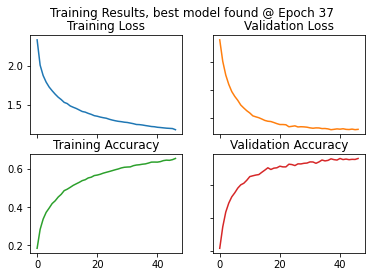

In [29]:
plot_results(addB)

In [30]:
# Loading best model found:

best_model = Net.load_model("model/" + mlp.model_name)
best_model.test_network(train_set, "train data")
best_model.test_network(valid_set, "valid data")
best_model.test_network(test_set, "test data")

-------------------------------------------
Accuracy on train data: 78.27%
Total Count:  40000
Total Match:  31310
-------------------------------------------
Test Accuracy of	0: 89.13% (3591/4029)
Test Accuracy of	1: 69.34% (2788/4021)
Test Accuracy of	2: 47.68% (1899/3983)
Test Accuracy of	3: 80.37% (3178/3954)
Test Accuracy of	4: 63.71% (2553/4007)
Test Accuracy of	5: 89.38% (3602/4030)
Test Accuracy of	6: 84.52% (3423/4050)
Test Accuracy of	7: 91.68% (3647/3978)
Test Accuracy of	8: 85.34% (3400/3984)
Test Accuracy of	9: 81.46% (3229/3964)
-------------------------------------------
Accuracy on valid data: 57.77%
Total Count:  10000
Total Match:  5777
-------------------------------------------
Test Accuracy of	0: 70.96% (689/971)
Test Accuracy of	1: 41.57% (407/979)
Test Accuracy of	2: 34.22% (348/1017)
Test Accuracy of	3: 55.83% (584/1046)
Test Accuracy of	4: 47.23% (469/993)
Test Accuracy of	5: 65.88% (639/970)
Test Accuracy of	6: 59.58% (566/950)
Test Accuracy of	7: 77.01% (787/

## Scenario C

In [31]:
mlp = Net(
    optimizer = Adam(),
    criterion = CrossEntropyLoss(),
    batch_norm = True,
    L2_reg_term = 0.001
)

mlp.add(Linear(128, 1024, dropout=0.4))
mlp.add(ReLU())
# adding layer
mlp.add(Linear(1024, 512, dropout=0.4))
mlp.add(ReLU())
mlp.add(Linear(512, 128, dropout=0.2))
mlp.add(ReLU())
mlp.add(Linear(128, 32, dropout=0.2))
mlp.add(ReLU())
mlp.add(Linear(32, 16, dropout=0.2))  
mlp.add(ReLU())
mlp.add(Linear(16, 10))  


mlp.set_name("Adam_network")
print(f"{mlp.model_name} is initialized and ready to be trained.")

Adam_network is initialized and ready to be trained.


## Train and Evaluate Scenario C

In [32]:

mlp.set_name("add3")
print(f"{mlp.model_name} is initialized and ready to be trained.")

addC = mlp.train_convergence(
    train_set = train_set,
    valid_set = valid_set,
    batch_size = 500,
    planned_epochs = 100,
    last_check = 10,
    threshold = 1e-25,
    report_interval = 5
)

{"tags": ["hide-output"]}

add3 is initialized and ready to be trained.


  1%|█▍                                                                                                                                           | 1/100 [00:08<13:24,  8.13s/it]

Epoch: 0	Interval Time: 8.1 sec(s)	Training Loss: 2.345788		Training Accuracy: 0.169975
						Validation Loss:1.967015	Validation Accuracy: 0.307200


  6%|████████▍                                                                                                                                    | 6/100 [00:49<13:02,  8.32s/it]

Epoch: 5	Interval Time: 41.4 sec(s)	Training Loss: 1.680194		Training Accuracy: 0.408425
						Validation Loss:1.553577	Validation Accuracy: 0.469300


 11%|███████████████▍                                                                                                                            | 11/100 [01:30<12:12,  8.23s/it]

Epoch: 10	Interval Time: 41.3 sec(s)	Training Loss: 1.517639		Training Accuracy: 0.486325
						Validation Loss:1.430776	Validation Accuracy: 0.517400


 16%|██████████████████████▍                                                                                                                     | 16/100 [02:11<11:35,  8.28s/it]

Epoch: 15	Interval Time: 41.2 sec(s)	Training Loss: 1.427705		Training Accuracy: 0.528475
						Validation Loss:1.377731	Validation Accuracy: 0.544500


 21%|█████████████████████████████▍                                                                                                              | 21/100 [02:56<11:19,  8.60s/it]

Epoch: 20	Interval Time: 44.3 sec(s)	Training Loss: 1.370125		Training Accuracy: 0.555125
						Validation Loss:1.354126	Validation Accuracy: 0.554300


 26%|████████████████████████████████████▍                                                                                                       | 26/100 [03:37<10:09,  8.23s/it]

Epoch: 25	Interval Time: 41.0 sec(s)	Training Loss: 1.321667		Training Accuracy: 0.582900
						Validation Loss:1.341259	Validation Accuracy: 0.560100


 31%|███████████████████████████████████████████▍                                                                                                | 31/100 [04:21<10:11,  8.86s/it]

Epoch: 30	Interval Time: 44.5 sec(s)	Training Loss: 1.295040		Training Accuracy: 0.595325
						Validation Loss:1.334890	Validation Accuracy: 0.562200


 32%|████████████████████████████████████████████▊                                                                                               | 32/100 [04:40<09:55,  8.76s/it]



Minimum percent change (1e-25%) in training loss not exceeded.

Convergence criteria achieved.
Training completed @ Epoch 32.
Total training time: 4 min 40.2 s

                Best model found @ Epoch 32
                --------------------------------------------
                Training Loss: 1.284628
                Validation Loss: 1.327777
                --------------------------------------------
                Training Accuracy: 0.598350
                Validation Accuracy: 0.567300


Best model 'add3' saved in 'model/' directory.


{'tags': ['hide-output']}

<Figure size 720x504 with 0 Axes>

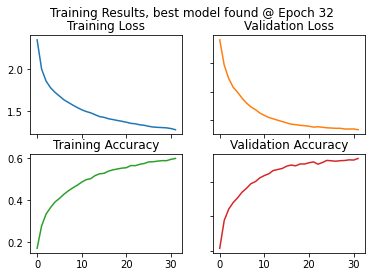

In [34]:
plot_results(addC)

In [33]:
# Loading best model found:

best_model = Net.load_model("model/" + mlp.model_name)
best_model.test_network(train_set, "train data")
best_model.test_network(valid_set, "valid data")
best_model.test_network(test_set, "test data")

-------------------------------------------
Accuracy on train data: 74.73%
Total Count:  40000
Total Match:  29892
-------------------------------------------
Test Accuracy of	0: 86.10% (3469/4029)
Test Accuracy of	1: 66.97% (2693/4021)
Test Accuracy of	2: 48.53% (1933/3983)
Test Accuracy of	3: 68.41% (2705/3954)
Test Accuracy of	4: 57.60% (2308/4007)
Test Accuracy of	5: 85.04% (3427/4030)
Test Accuracy of	6: 82.44% (3339/4050)
Test Accuracy of	7: 88.44% (3518/3978)
Test Accuracy of	8: 84.71% (3375/3984)
Test Accuracy of	9: 78.83% (3125/3964)
-------------------------------------------
Accuracy on valid data: 56.73%
Total Count:  10000
Total Match:  5673
-------------------------------------------
Test Accuracy of	0: 67.25% (653/971)
Test Accuracy of	1: 45.45% (445/979)
Test Accuracy of	2: 35.59% (362/1017)
Test Accuracy of	3: 50.38% (527/1046)
Test Accuracy of	4: 44.71% (444/993)
Test Accuracy of	5: 66.39% (644/970)
Test Accuracy of	6: 62.42% (593/950)
Test Accuracy of	7: 73.39% (750/